In [68]:
!cp /content/drive/MyDrive/googleColabStuff/ColabStuff/Analyse_data_fonctions/fonctions.py /content/

In [94]:
#import tools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#sklearn fonctionnality
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import euclidean_distances
from sklearn.metrics import mean_absolute_error
#model for our regression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
#our convenient fonction
from fonctions import *

# Define task
<mark>Make a prediction of country life expectancy based on some set of country</mark>

# *Acquire clean data*

load data

In [70]:
data_path="/content/drive/MyDrive/googleColabStuff/ColabStuff/data/world_data.csv"

In [71]:
dataset=pd.read_csv(data_path)

In [72]:
dataset.head()

,country,happiness,income,lifeexp,sanitation,water,urbanpopulation,unemployment,literacy,inequality,murder,energy,childmortality,fertility,hiv,foodsupply,population
0,Afghanistan,3.982855,1750.0,57.9,39.2,63.0,11.0,NaN,39.0,NaN,NaN,NaN,73.2,4.80,5800.0,2090.0,33700000
1,Albania,4.606651,11000.0,77.6,97.7,91.4,NaN,6.090,96.8,29.0,2.30,808.0,14.0,1.71,NaN,3190.0,2920000
2,Argentina,6.697131,19100.0,76.5,94.8,99.6,43.1,0.856,97.9,41.4,4.65,2020.0,11.6,2.31,95000.0,3230.0,43400000
3,Armenia,4.348320,8180.0,75.4,91.6,98.9,36.7,7.110,99.6,32.4,1.12,1020.0,14.0,1.66,3600.0,2930.0,2920000
4,Australia,7.309061,43800.0,82.6,100.0,100.0,60.2,1.240,NaN,34.7,1.11,5480.0,3.8,1.86,22000.0,3280.0,23800000


Inspecting data in the way of cleaning

In [73]:
dataset.dtypes

country             object
happiness          float64
income             float64
lifeexp            float64
sanitation         float64
water              float64
urbanpopulation    float64
unemployment       float64
literacy           float64
inequality         float64
murder             float64
energy             float64
childmortality     float64
fertility          float64
hiv                float64
foodsupply         float64
population           int64
dtype: object

In [74]:
dataset.isnull().mean().sort_values()

country            0.000000
water              0.000000
sanitation         0.000000
population         0.000000
income             0.005155
childmortality     0.005155
lifeexp            0.036082
fertility          0.051546
energy             0.128866
foodsupply         0.134021
inequality         0.175258
hiv                0.231959
literacy           0.231959
happiness          0.278351
urbanpopulation    0.386598
unemployment       0.422680
murder             0.520619
dtype: float64

Clean data

In [75]:
data=dataset.drop(['urbanpopulation','unemployment','murder'],axis=1)

In [76]:
data.columns

Index(['country', 'happiness', 'income', 'lifeexp', 'sanitation', 'water',
       'literacy', 'inequality', 'energy', 'childmortality', 'fertility',
       'hiv', 'foodsupply', 'population'],
      dtype='object')

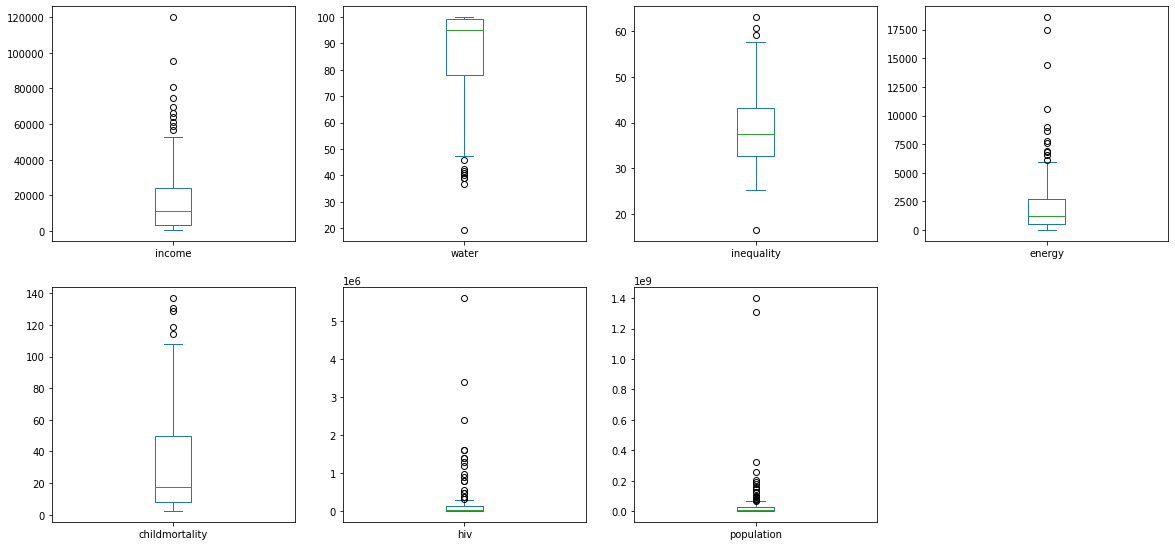

In [77]:
boxPlotAll(data[['income', 'water','inequality', 'energy', 'childmortality','hiv','population']])

In [78]:
data.head()

,country,happiness,income,lifeexp,sanitation,water,literacy,inequality,energy,childmortality,fertility,hiv,foodsupply,population
0,Afghanistan,3.982855,1750.0,57.9,39.2,63.0,39.0,NaN,NaN,73.2,4.80,5800.0,2090.0,33700000
1,Albania,4.606651,11000.0,77.6,97.7,91.4,96.8,29.0,808.0,14.0,1.71,NaN,3190.0,2920000
2,Argentina,6.697131,19100.0,76.5,94.8,99.6,97.9,41.4,2020.0,11.6,2.31,95000.0,3230.0,43400000
3,Armenia,4.348320,8180.0,75.4,91.6,98.9,99.6,32.4,1020.0,14.0,1.66,3600.0,2930.0,2920000
4,Australia,7.309061,43800.0,82.6,100.0,100.0,NaN,34.7,5480.0,3.8,1.86,22000.0,3280.0,23800000


Inpute Outliers

In [79]:
data.loc[[ 56,  64,  71,  92, 101, 109, 119, 130, 147, 170],'income']=np.nan
data.loc[[ 156],'water']=np.nan
data.loc[[  6,  15, 113, 138, 150, 171, 186],'inequality']=np.nan
data.loc[[  4,   7,  21,  39,  51,  64,  71,  92, 101, 105, 114, 130, 132,147, 174, 190],'energy']=np.nan
data.loc[[112,150],'childmortality']=np.nan
data.loc[[ 20,  24,  38,  52,  63,  74,  84,  91, 113, 122, 128, 132, 138,139],'hiv']=np.nan
data.loc[[24,52,132, 136],'population']=np.nan

means=data.mean().to_dict()
for m in means:
  data[m]=data[m].fillna(value=means[m])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  if __name__ == '__main__':


In [80]:
data.isnull().mean()

country           0.0
happiness         0.0
income            0.0
lifeexp           0.0
sanitation        0.0
water             0.0
literacy          0.0
inequality        0.0
energy            0.0
childmortality    0.0
fertility         0.0
hiv               0.0
foodsupply        0.0
population        0.0
dtype: float64

## *Understanding data*

In [81]:
data.describe()

,happiness,income,lifeexp,sanitation,water,literacy,inequality,energy,childmortality,fertility,hiv,foodsupply,population
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,1.940000e+02
mean,5.395765,14308.961749,71.933690,73.838247,86.676684,81.573826,37.925490,1476.663922,30.378010,2.835924,63561.185185,2845.952381,2.222925e+07
std,0.953547,12921.546881,7.466359,29.269367,16.889143,17.055722,6.066851,1132.620261,29.455813,1.336162,79307.870233,413.199619,3.855861e+07
min,2.701591,623.000000,49.600000,7.080000,36.600000,25.300000,25.400000,9.580000,2.200000,1.240000,60.000000,1880.000000,1.100000e+04
25%,4.891838,3297.500000,66.425000,49.225000,78.350000,75.575000,34.000000,614.500000,8.200000,1.790000,10250.000000,2570.000000,1.982500e+06
50%,5.395765,11050.000000,72.550000,87.900000,94.950000,81.573826,37.925490,1476.663922,17.900000,2.415000,63561.185185,2845.952381,8.435000e+06
75%,5.880369,20400.000000,77.400000,97.700000,99.300000,95.375000,41.325000,1855.000000,47.475000,3.687500,63561.185185,3140.000000,2.362500e+07
max,7.603434,52800.000000,83.800000,100.000000,100.000000,100.000000,54.200000,5120.000000,131.000000,7.290000,490000.000000,3770.000000,2.580000e+08


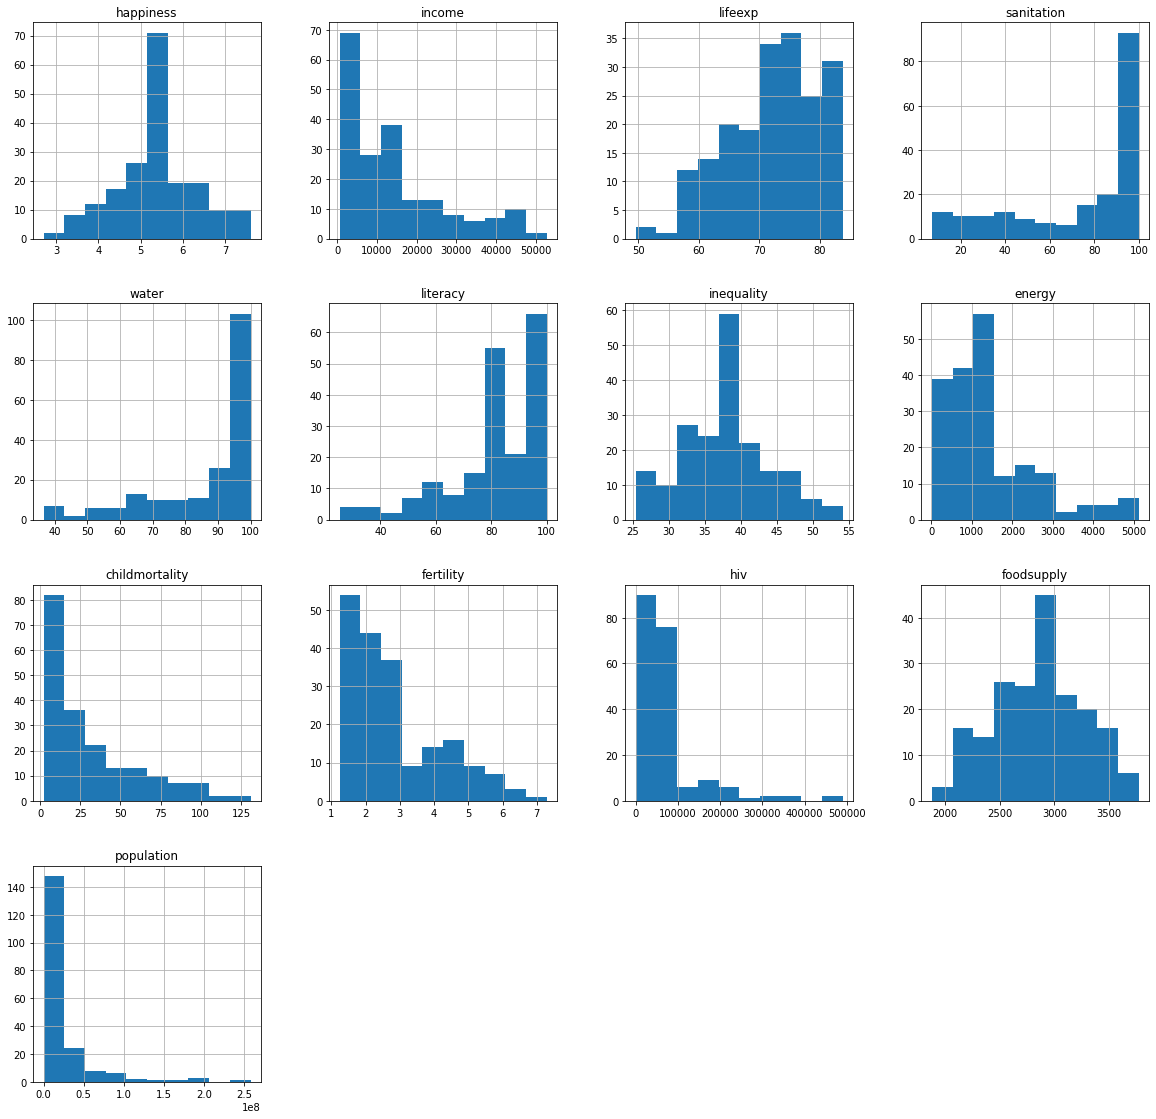

In [82]:
histPlotAll(data)

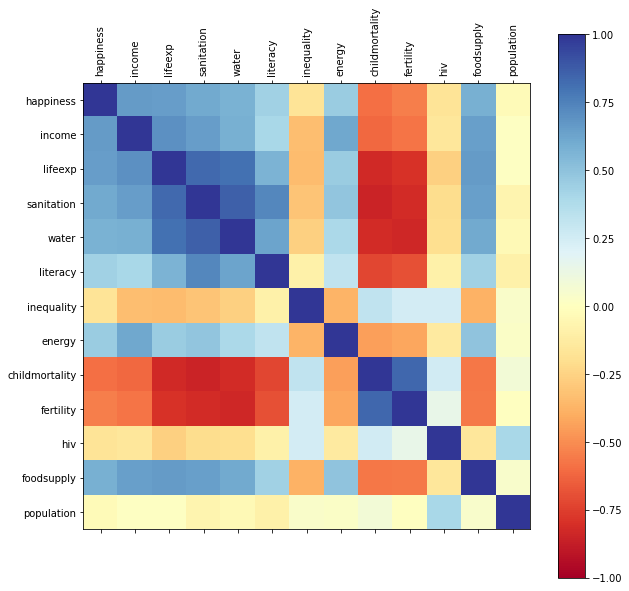

In [83]:
correlationMatrix(data)

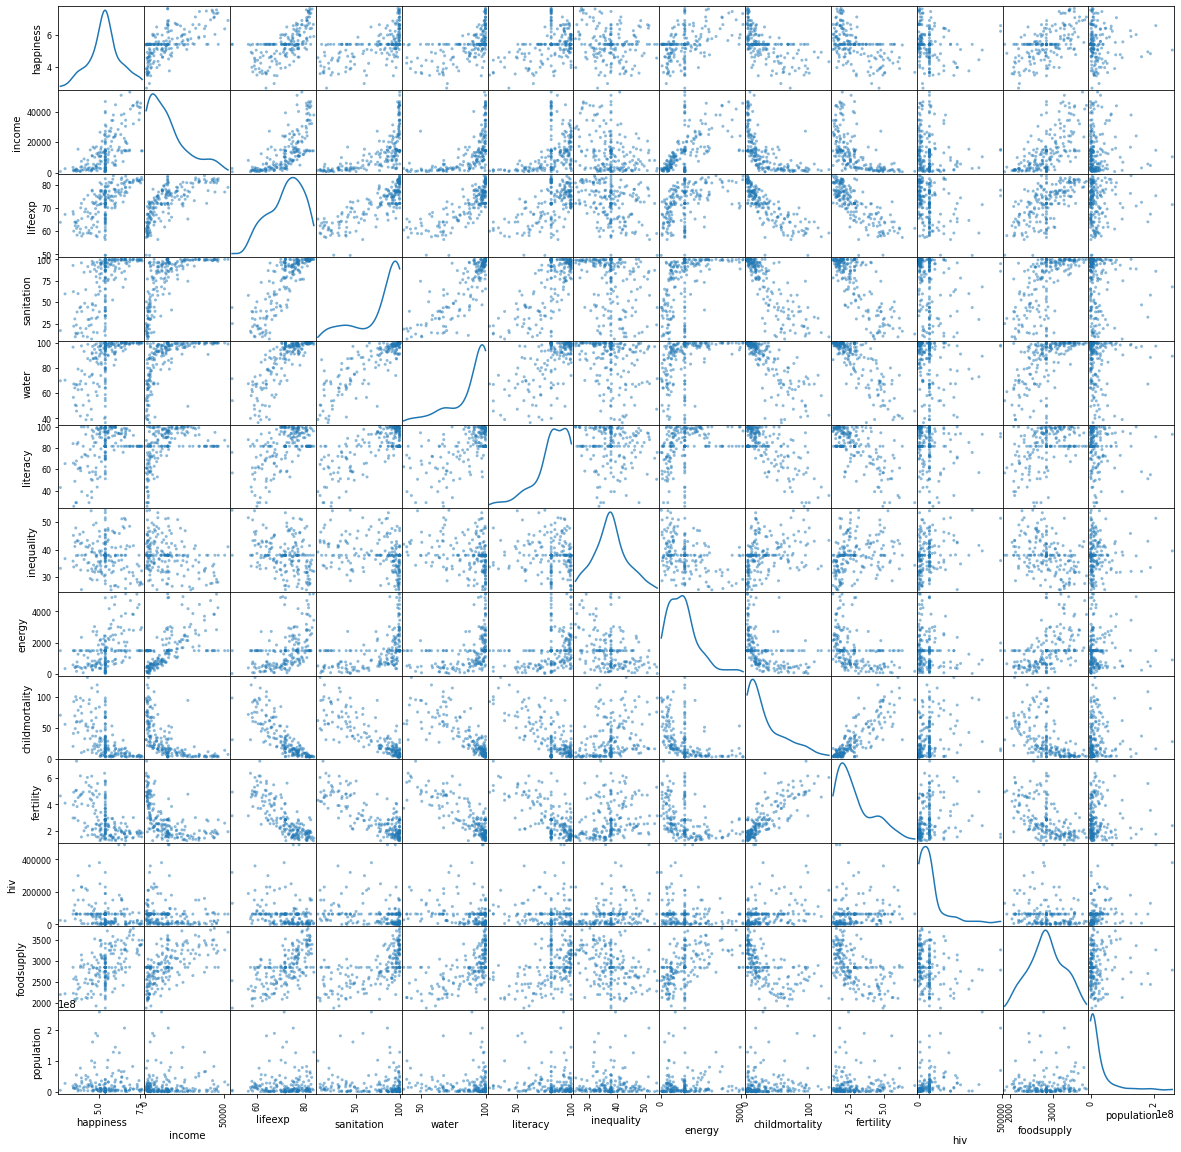

In [84]:
scatterMatrix(data)

## *Prepare data*

*Select features*

In [85]:
data.columns

Index(['country', 'happiness', 'income', 'lifeexp', 'sanitation', 'water',
       'literacy', 'inequality', 'energy', 'childmortality', 'fertility',
       'hiv', 'foodsupply', 'population'],
      dtype='object')

In [86]:
y=data['lifeexp']

X=data[['happiness', 'income', 'sanitation', 'water',
       'literacy', 'inequality', 'energy', 'childmortality', 'fertility',
       'hiv', 'foodsupply', 'population']]

In [87]:
X.describe()

,happiness,income,sanitation,water,literacy,inequality,energy,childmortality,fertility,hiv,foodsupply,population
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,1.940000e+02
mean,5.395765,14308.961749,73.838247,86.676684,81.573826,37.925490,1476.663922,30.378010,2.835924,63561.185185,2845.952381,2.222925e+07
std,0.953547,12921.546881,29.269367,16.889143,17.055722,6.066851,1132.620261,29.455813,1.336162,79307.870233,413.199619,3.855861e+07
min,2.701591,623.000000,7.080000,36.600000,25.300000,25.400000,9.580000,2.200000,1.240000,60.000000,1880.000000,1.100000e+04
25%,4.891838,3297.500000,49.225000,78.350000,75.575000,34.000000,614.500000,8.200000,1.790000,10250.000000,2570.000000,1.982500e+06
50%,5.395765,11050.000000,87.900000,94.950000,81.573826,37.925490,1476.663922,17.900000,2.415000,63561.185185,2845.952381,8.435000e+06
75%,5.880369,20400.000000,97.700000,99.300000,95.375000,41.325000,1855.000000,47.475000,3.687500,63561.185185,3140.000000,2.362500e+07
max,7.603434,52800.000000,100.000000,100.000000,100.000000,54.200000,5120.000000,131.000000,7.290000,490000.000000,3770.000000,2.580000e+08


Scale data

In [88]:
scaler=MinMaxScaler(feature_range=(0,1))
rescaledX=scaler.fit_transform(X)

X=pd.DataFrame(rescaledX,columns=X.columns)

In [89]:
X.describe()

,happiness,income,sanitation,water,literacy,inequality,energy,childmortality,fertility,hiv,foodsupply,population
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,0.549625,0.262299,0.718449,0.789853,0.753331,0.434913,0.287077,0.218773,0.263789,0.129610,0.511086,0.086121
std,0.194528,0.247648,0.314995,0.266390,0.228323,0.210655,0.221630,0.228694,0.220853,0.161873,0.218624,0.149458
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.446821,0.051258,0.453562,0.658517,0.673025,0.298611,0.118370,0.046584,0.090909,0.020798,0.365079,0.007642
50%,0.549625,0.199839,0.869780,0.920347,0.753331,0.434913,0.287077,0.121894,0.194215,0.129610,0.511086,0.032653
75%,0.648486,0.379037,0.975248,0.988959,0.938086,0.552951,0.361109,0.351514,0.404545,0.129610,0.666667,0.091531
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## *Build model*

In [90]:
test_size = 0.33
seed = 1
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [93]:
models=[LinearRegression(),KNeighborsRegressor(),SVR()]

fit the model to the data

In [95]:
for model in models:
  model.fit(X_train,Y_train)
  predictions=model.predict(X_train)
  print(type(model).__name__,mean_absolute_error(Y_train,predictions))

LinearRegression 2.4025739095061085
KNeighborsRegressor 2.275503875968991
SVR 2.6128033065363803


Evaluate the model

In [96]:
for model in models:
  predictions=model.predict(X_test)
  print(type(model).__name__,mean_absolute_error(Y_test,predictions))

LinearRegression 2.644305710460956
KNeighborsRegressor 2.5084080625257097
SVR 2.784075392123287


In [97]:
model=models[1]

In [102]:
predictions=model.predict(X_test)
data=X_test.copy()
data['predictions']=predictions
data['actual']=Y_test
data['error']=Y_test-predictions
data.head()

,happiness,income,sanitation,water,literacy,inequality,energy,childmortality,fertility,hiv,foodsupply,population,predictions,actual,error
44,0.262009,0.063380,0.077701,0.649842,0.618474,0.590278,0.063678,0.456522,0.462810,0.469323,0.603175,0.106939,62.380000,65.40000,3.020000
172,0.549625,0.223796,0.629789,1.000000,0.753331,0.434913,0.287077,0.259317,0.263789,0.129610,0.511086,0.000001,70.393476,71.93369,1.540214
163,0.549625,0.023899,0.352131,0.438486,0.753331,0.402778,0.020433,0.416925,0.404959,0.129610,0.613757,0.000391,65.560000,61.60000,-3.960000
35,0.420443,0.181632,0.926819,0.974763,0.638554,0.222222,0.157603,0.166925,0.342149,0.019268,0.867725,0.363539,74.360000,71.90000,-2.460000
136,0.484455,0.096728,0.765390,0.861199,0.911647,0.326389,0.126295,0.153727,0.119008,0.510144,0.460317,0.086121,71.526738,74.30000,2.773262


Iterer

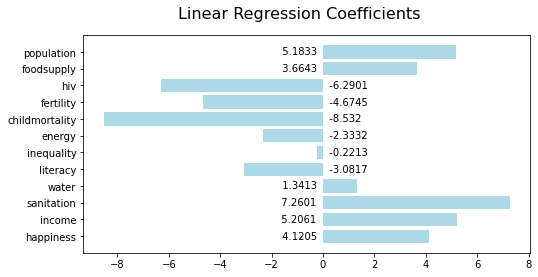

In [103]:
linearRegressionSummary(models[0],X.columns)

In [105]:
models[0].coef_

array([ 4.12052773,  5.20612736,  7.26007756,  1.34129191, -3.08173966,
       -0.22130488, -2.33321934, -8.53196524, -4.67447928, -6.29006807,
        3.66426304,  5.18331467])

In [106]:
models[0].intercept_

66.56457388581937